In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("irisraw.csv")

In [3]:
dataset.head(5)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset = dataset.drop(columns=['species'])

In [5]:
dataset.head(5)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


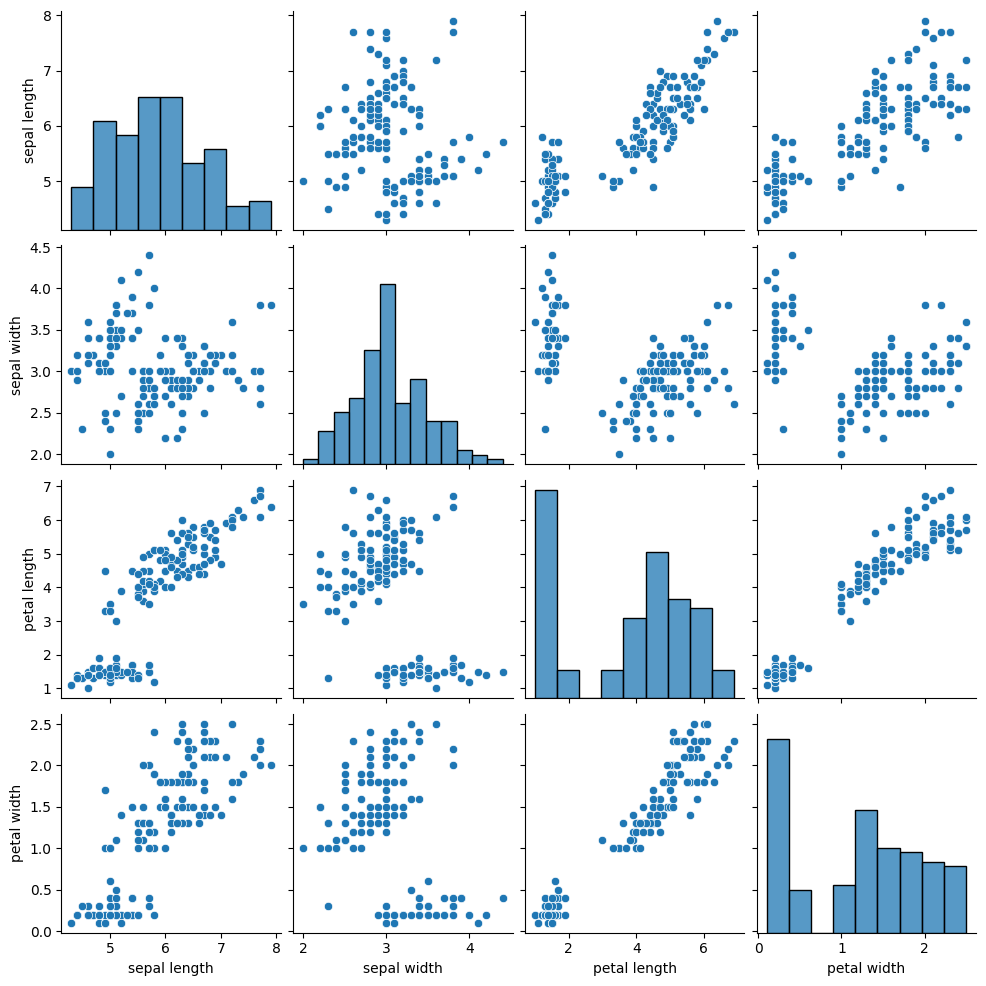

In [7]:
sns.pairplot(data=dataset)
plt.show()

In [8]:
from sklearn.cluster import KMeans

In [10]:
wcss = []

# since we dono know the no. of cluster that can be made so we will use loop and best number cluster will be found

for i in range(2,21):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_) 

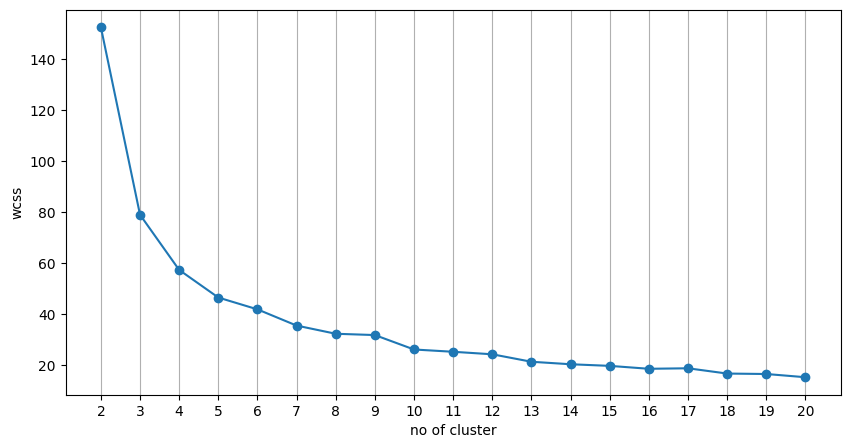

In [18]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)],wcss,marker="o")
plt.xlabel("no of cluster")
plt.xticks([i for i in range(2,21)])
plt.ylabel("wcss")
plt.grid(axis="x")
plt.show()

In [19]:
# we can see 3 is the point where graph turns downwards and this is ELBOW_POINT . Hence, this dataset will have 3 cluster

In [23]:
kmn = KMeans(n_clusters=3)
dataset["Predict"] = kmn.fit_predict(dataset)

In [25]:
dataset = dataset.drop(columns=['fit_predict'])

In [26]:
dataset

,sepal length,sepal width,petal length,petal width,Predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


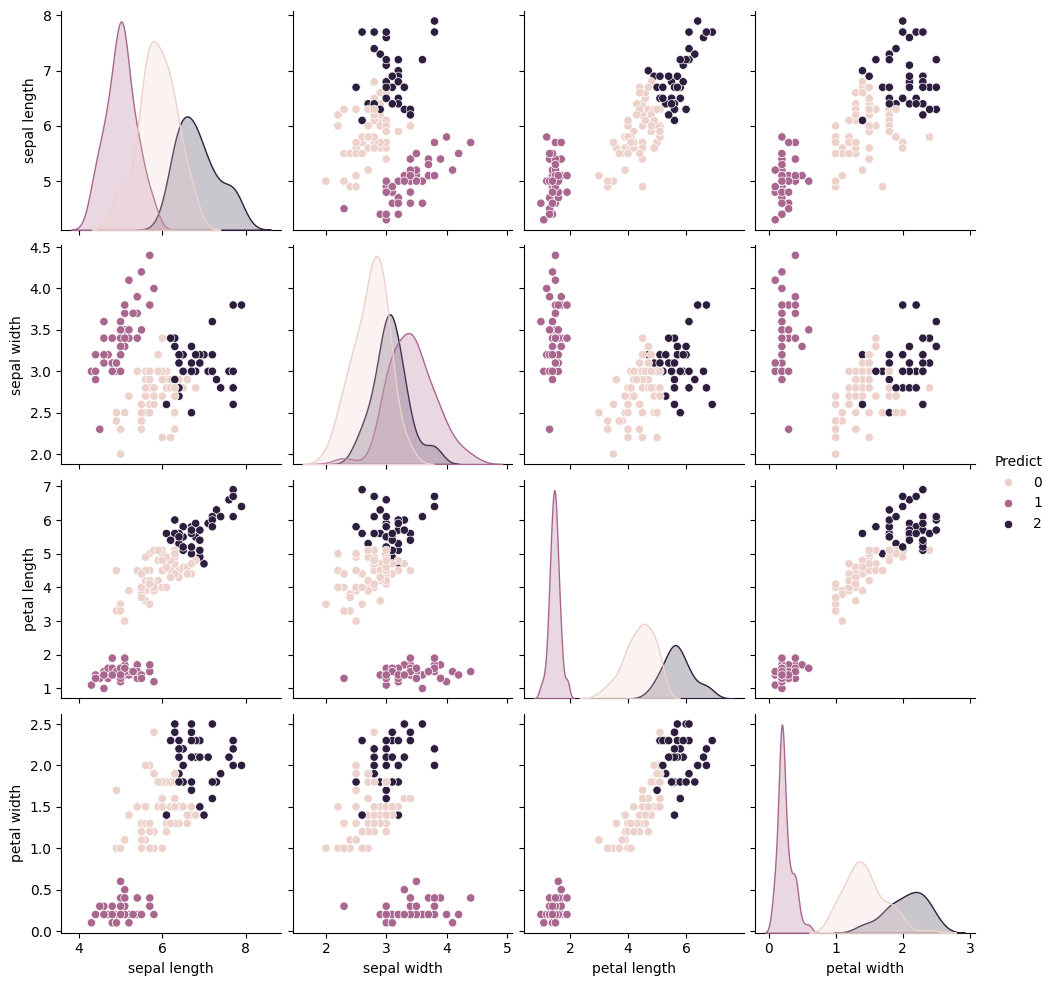

In [27]:
sns.pairplot(data=dataset,hue="Predict")
plt.show()

In [30]:
# Inorder to compare it with original data

org_dataset = pd.read_csv(r"Iris.csv")

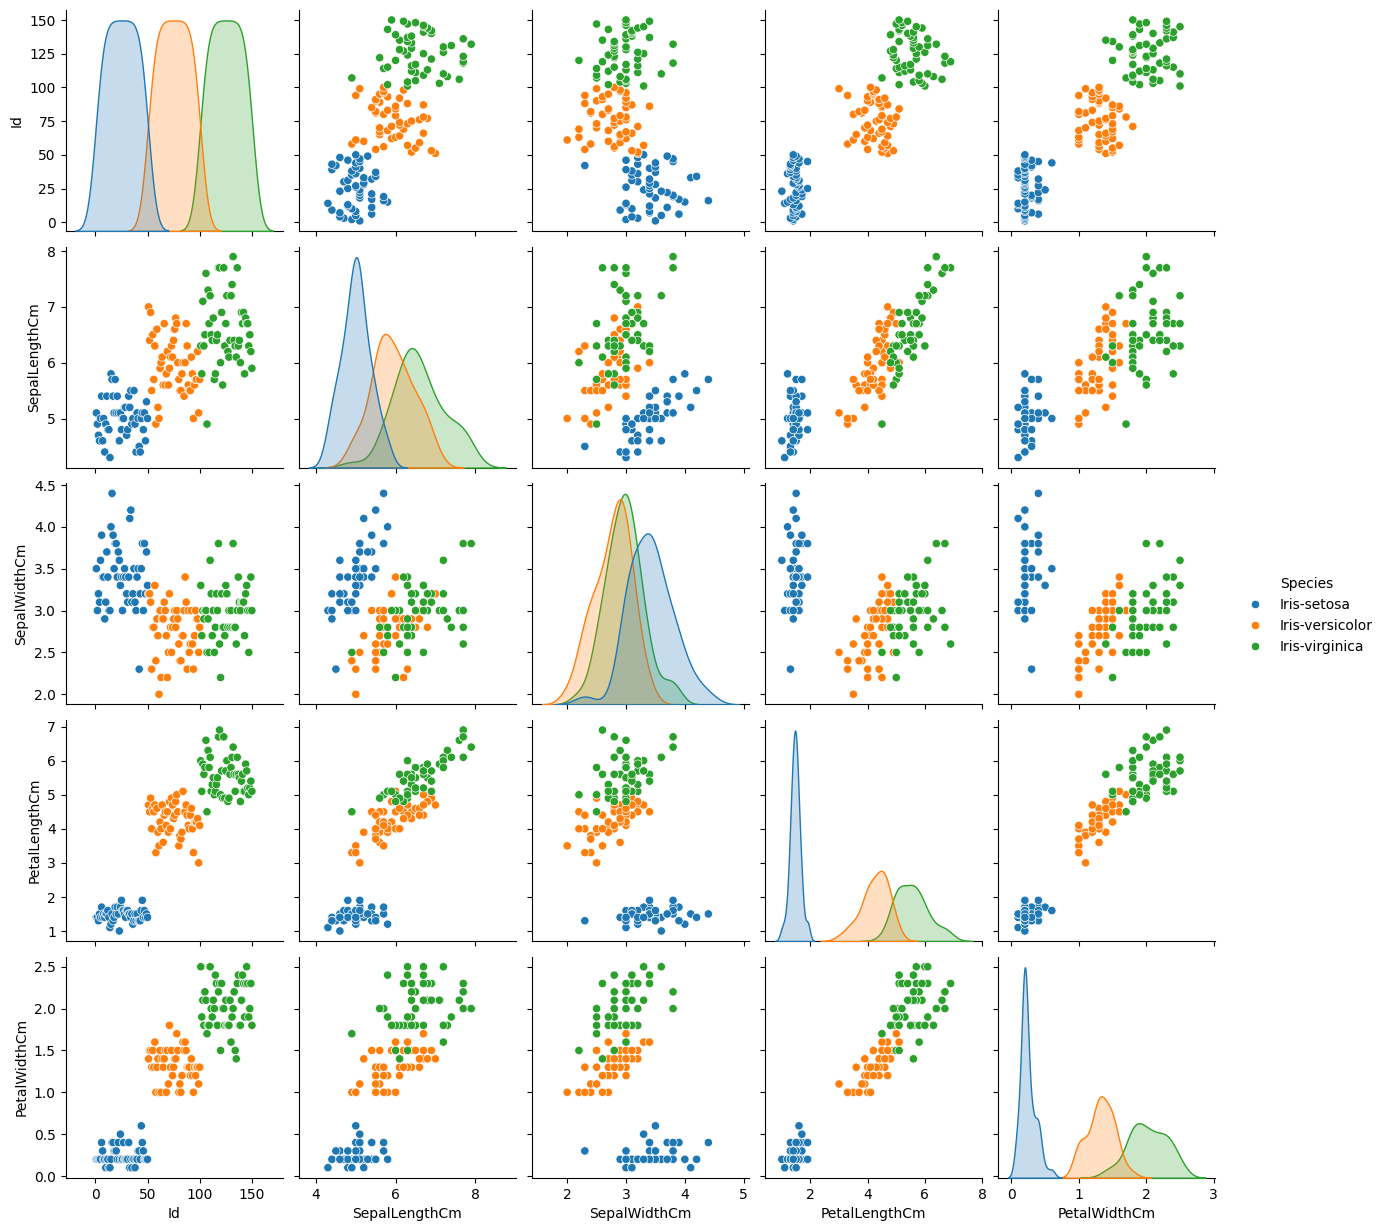

In [31]:
sns.pairplot(data=org_dataset,hue="Species")
plt.show()